<a href="https://colab.research.google.com/github/SowjanyaKiran/sowjanya-/blob/main/Stroke_Prediction_Dataset_Random_forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
# Importing important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the data
df = pd.read_csv('/content/healthcare-dataset-stroke-data.csv', index_col = 0)
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [9]:
# Drop irrelevant columns
df = df.reset_index()  # Reset the index to make 'id' a regular column
df.drop(['id'], axis=1, inplace=True)

In [12]:
# Handle missing values
df['bmi'].fillna(df['bmi'].mean(), inplace=True)

In [17]:
# Seperating the input and output features
X = df.drop('stroke', axis = 1)
y = df['stroke']

In [18]:
# Performing train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)

In [19]:
# Encode categorical variables
le = LabelEncoder()
categorical_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

In [20]:
# Creating the model
model = RandomForestRegressor(random_state = 3)

# Fitting the model
model.fit(X_train, y_train)

RandomForestRegressor(random_state=3)

In [21]:
# Taking predictions from the model
y_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

In [30]:
# Initialize and train the model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Make predictions
y_pred = rf.predict(X_test)

# Import confusion_matrix
from sklearn.metrics import confusion_matrix

# Convert predictions to binary values (0 or 1) using a threshold
y_pred_binary = [1 if p >= 0.5 else 0 for p in y_pred] # You might need to adjust the threshold (0.5 here)

# Evaluate the model using appropriate metrics for regression
print("R-squared:", metrics.r2_score(y_test, y_pred))
print("Mean Squared Error:", metrics.mean_squared_error(y_test, y_pred))

R-squared: 0.020968980967486228
Mean Squared Error: 0.04727915851272015


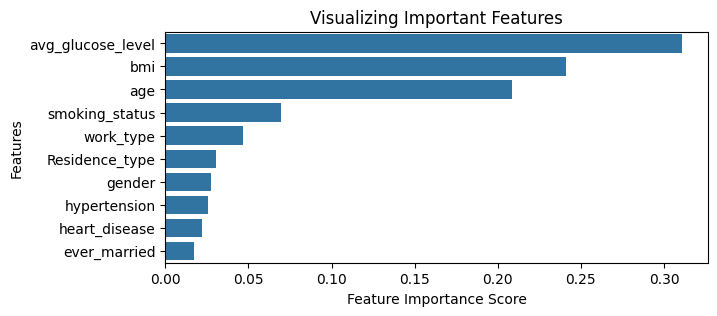

In [23]:
# Feature Importance Plot
feature_imp = pd.Series(model.feature_importances_, index = X.columns).sort_values(ascending = False)
plt.figure(figsize = (7, 3))
sns.barplot(x = feature_imp, y = feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Visualizing Important Features')